In [43]:
from file import test_complete_system
import numpy as np
from substitute_perbutate import FresnelSubstitution , PixelPerturbation
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
image_to_encrypt = "medical images/Brain MRI.jpg"
biometric_enroll = "biometric images/kelvinl3.jpg"
biometric_probe = "biometric images/kelvinl5.jpg"

In [45]:

def combined_encryption(image_path, seed_d=12345, seed_f=67890, r=3.99, x=0.5):
    """
    Combined encryption: Substitution -> Perturbation -> Inverse Perturbation -> Inverse Substitution
    
    
    Args:
        image_path: Path to the input image
        seed_d: Seed for distance parameter (substitution)
        seed_f: Seed for frequency parameter (substitution)
        r: Logistic map parameter (perturbation)
        x: Initial value for logistic map (perturbation)
        
    Returns:
        original_img, after_substitution, after_perturbation, after_inv_perturbation, final_recovered
    """
    # Load image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    print(f"Original image shape: {img_array.shape}")
    height, width = img_array.shape
    
    # ==================== STEP 1: SUBSTITUTION ====================
    print("\n" + "="*60)
    print("STEP 1: SUBSTITUTION")
    print("="*60)
    
    fs = FresnelSubstitution(seed_d=seed_d, seed_f=seed_f)
    substituted_array = np.zeros_like(img_array)
    
    print("Performing substitution...")
    for i in range(height):
        if i % 50 == 0:
            print(f"  Processing row {i}/{height}")
        row = img_array[i, :]
        substituted_row = fs.substitute(row)
        substituted_array[i, :] = substituted_row
    
    print("✓ Substitution complete!")
    
    # ==================== STEP 2: PERTURBATION ====================
    print("\n" + "="*60)
    print("STEP 2: PERTURBATION")
    print("="*60)
    
    pp = PixelPerturbation(r_init=r, x_init=x)
    pp.x_original = x
    
    print("Performing perturbation on substituted image...")
    perturbed_array = pp.perturbate_image(substituted_array.copy())
    print("✓ Perturbation complete!")
    
    return img_array, substituted_array, perturbed_array


In [46]:
[image_array1 , substitued_array1 , perturbed_array1] = combined_encryption(image_path='medical images/Brain MRI.jpg')
[image_array2 , substitued_array2 , perturbed_array2] = combined_encryption(image_path='medical images/fetus ultrasound.jpg')
[image_array3 , substitued_array3 , perturbed_array3] = combined_encryption(image_path='medical images/lung ct scan.jpg')
[image_array4 , substitued_array4 , perturbed_array4] = combined_encryption(image_path='medical images/teeth xray.jpg')

Original image shape: (128, 128)

STEP 1: SUBSTITUTION
Performing substitution...
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
✓ Substitution complete!

STEP 2: PERTURBATION
Performing perturbation on substituted image...
✓ Perturbation complete!
Original image shape: (128, 128)

STEP 1: SUBSTITUTION
Performing substitution...
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
✓ Substitution complete!

STEP 2: PERTURBATION
Performing perturbation on substituted image...
✓ Perturbation complete!
Original image shape: (128, 128)

STEP 1: SUBSTITUTION
Performing substitution...
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
✓ Substitution complete!

STEP 2: PERTURBATION
Performing perturbation on substituted image...
✓ Perturbation complete!
Original image shape: (128, 128)

STEP 1: SUBSTITUTION
Performing substitution...
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
✓ Substitution complete!

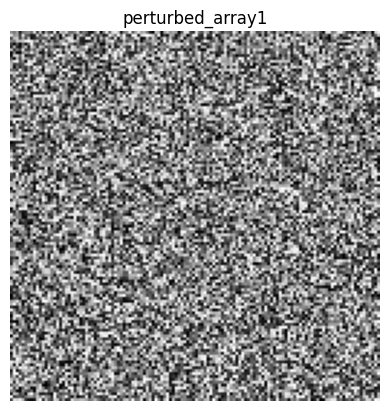

In [47]:
import matplotlib.pyplot as plt

if perturbed_array1 is not None:
    plt.imshow(perturbed_array1, cmap='gray')
    plt.title("perturbed_array1")
    plt.axis('off')
    plt.show()

#### Enroll biometric and encrypt with AES


In [48]:
from helper import enroll_biometric, aes_encrypt_numpy_array

In [49]:
key, helper_data = enroll_biometric(biometric_enroll)
[ciphertext1, iv1, metadata1] = aes_encrypt_numpy_array(perturbed_array1, key)
[ciphertext2, iv2, metadata2] = aes_encrypt_numpy_array(perturbed_array2, key)
[ciphertext3, iv3, metadata3] = aes_encrypt_numpy_array(perturbed_array3, key)
[ciphertext4, iv4, metadata4] = aes_encrypt_numpy_array(perturbed_array4, key)

[Enrollment] Processing: biometric images/kelvinl3.jpg
[Enrollment] Key generated (32 bytes), Helper data created
[AES Encrypt] Array shape (128, 128), dtype uint8
[AES Encrypt] Plaintext: 16384 bytes → Ciphertext: 16400 bytes
[AES Encrypt] Array shape (128, 128), dtype uint8
[AES Encrypt] Plaintext: 16384 bytes → Ciphertext: 16400 bytes
[AES Encrypt] Array shape (128, 128), dtype uint8
[AES Encrypt] Plaintext: 16384 bytes → Ciphertext: 16400 bytes
[AES Encrypt] Array shape (128, 128), dtype uint8
[AES Encrypt] Plaintext: 16384 bytes → Ciphertext: 16400 bytes


In [50]:
type(ciphertext1)

bytes

#### Reproduce key from biometric probe

In [51]:
from helper import reproduce_biometric_key

In [52]:
try:
    key = reproduce_biometric_key(biometric_probe, helper_data)
except ValueError as e:
    print(f"\n✗ BIOMETRIC AUTHENTICATION FAILED")
    print(f"   {e}")
    raise

[Reproduction] Processing: biometric images/kelvinl5.jpg
[Reproduction] BCH decoding successful
[Reproduction] Key reproduced successfully (32 bytes)


#### AES decryption

In [53]:
from helper import aes_decrypt_to_numpy_array

In [54]:
try:
    recovered_perturbed_array1 = aes_decrypt_to_numpy_array(
            ciphertext1,
            iv1,
            key,
            metadata1
    )
    recovered_perturbed_array2 = aes_decrypt_to_numpy_array(
            ciphertext2,
            iv2,
            key,
            metadata2
    )
    recovered_perturbed_array3 = aes_decrypt_to_numpy_array(
            ciphertext3,
            iv3,
            key,
            metadata3
    )
    recovered_perturbed_array4 = aes_decrypt_to_numpy_array(
            ciphertext4,
            iv4,
            key,
            metadata4
    )
    
except Exception as e:
    print(f"\n✗ AES DECRYPTION FAILED")
    print(f"   {e}")
    raise

[AES Decrypt] Ciphertext: 16400 bytes → Plaintext: 16384 bytes
[AES Decrypt] Reconstructed array shape (128, 128), dtype uint8
[AES Decrypt] Ciphertext: 16400 bytes → Plaintext: 16384 bytes
[AES Decrypt] Reconstructed array shape (128, 128), dtype uint8
[AES Decrypt] Ciphertext: 16400 bytes → Plaintext: 16384 bytes
[AES Decrypt] Reconstructed array shape (128, 128), dtype uint8
[AES Decrypt] Ciphertext: 16400 bytes → Plaintext: 16384 bytes
[AES Decrypt] Reconstructed array shape (128, 128), dtype uint8


### successfully recovered perturbed_array

In [55]:
# np.abs(recovered_perturbed_array-perturbed_array)

#### INVERSE PERTURBATION

In [56]:
# parameters previously used
seed_d=12345
seed_f=67890
r=3.99
x=0.5

In [57]:
    
pp2 = PixelPerturbation(r_init=r, x_init=x)
pp2.x_original = x
    

In [58]:

inv_subs_array1 = pp2.perturbate_image_inverse(recovered_perturbed_array1.copy())
inv_subs_array2 = pp2.perturbate_image_inverse(recovered_perturbed_array2.copy())
inv_subs_array3 = pp2.perturbate_image_inverse(recovered_perturbed_array3.copy())
inv_subs_array4 = pp2.perturbate_image_inverse(recovered_perturbed_array4.copy())


In [59]:
# import matplotlib.pyplot as plt

# if inv_subs_array is not None:
#     plt.imshow(inv_subs_array, cmap='gray')
#     plt.title("Loaded & Prepared Image")
#     plt.axis('off')
#     plt.show()


#### INVERSE Substitution

In [60]:
fs = FresnelSubstitution(seed_d=seed_d, seed_f=seed_f)
recovered_array1 = np.zeros_like(inv_subs_array1)
recovered_array2 = np.zeros_like(inv_subs_array1)
recovered_array3 = np.zeros_like(inv_subs_array1)
recovered_array4 = np.zeros_like(inv_subs_array1)

In [61]:
height, width = inv_subs_array1.shape


In [62]:
for i in range(height):
        if i % 50 == 0:
            print(f"  Processing row {i}/{height}")
        row = inv_subs_array1[i, :]
        recovered_row = fs.substitute_inv(row)
        recovered_array1[i, :] = recovered_row

for i in range(height):
        if i % 50 == 0:
            print(f"  Processing row {i}/{height}")
        row = inv_subs_array2[i, :]
        recovered_row = fs.substitute_inv(row)
        recovered_array2[i, :] = recovered_row

for i in range(height):
        if i % 50 == 0:
            print(f"  Processing row {i}/{height}")
        row = inv_subs_array3[i, :]
        recovered_row = fs.substitute_inv(row)
        recovered_array3[i, :] = recovered_row

for i in range(height):
        if i % 50 == 0:
            print(f"  Processing row {i}/{height}")
        row = inv_subs_array4[i, :]
        recovered_row = fs.substitute_inv(row)
        recovered_array4[i, :] = recovered_row
    

  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128


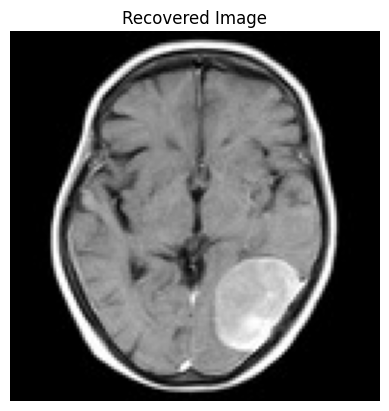

In [63]:
import matplotlib.pyplot as plt

if recovered_array1 is not None:
    plt.imshow(recovered_array1, cmap='gray')
    plt.title("Recovered Image")
    plt.axis('off')
    plt.show()


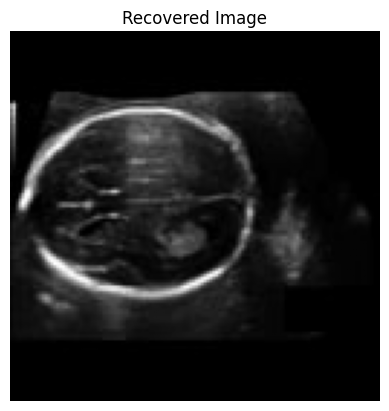

In [64]:
import matplotlib.pyplot as plt

if recovered_array2 is not None:
    plt.imshow(recovered_array2, cmap='gray')
    plt.title("Recovered Image")
    plt.axis('off')
    plt.show()


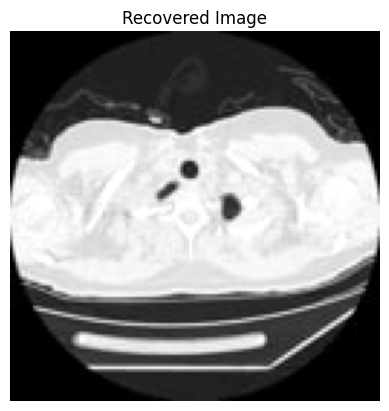

In [65]:
import matplotlib.pyplot as plt

if recovered_array3 is not None:
    plt.imshow(recovered_array3, cmap='gray')
    plt.title("Recovered Image")
    plt.axis('off')
    plt.show()


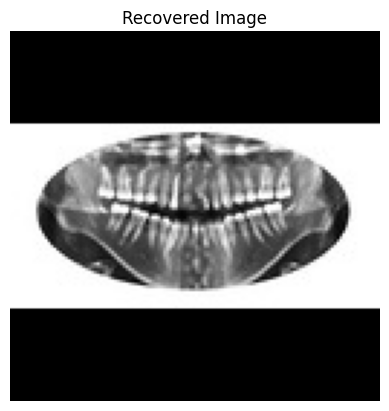

In [66]:
import matplotlib.pyplot as plt

if recovered_array4 is not None:
    plt.imshow(recovered_array4, cmap='gray')
    plt.title("Recovered Image")
    plt.axis('off')
    plt.show()


#### 3D Histogram showcasing plaintext and ciphertext 

C:\Users\suraj\AppData\Local\Temp\ipykernel_13844\3468462553.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


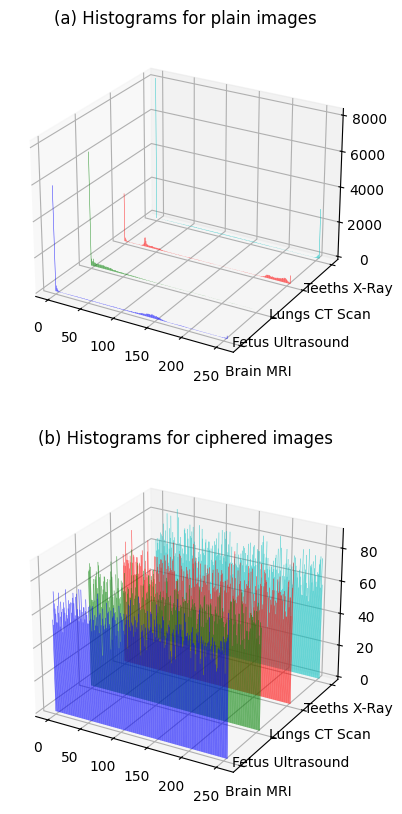

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------------------------------
# Define labels and colors
# ---------------------------------------------------
images = ['Brain MRI', 'Fetus Ultrasound', 'Lungs CT Scan', 'Teeths X-Ray']
colors = ['b', 'g', 'r', 'c']
bins = np.arange(256)

# ---------------------------------------------------
# Convert ciphertext bytes to uint8 arrays
# ---------------------------------------------------
cipher_array1 = np.frombuffer(ciphertext1, dtype=np.uint8)
cipher_array2 = np.frombuffer(ciphertext2, dtype=np.uint8)
cipher_array3 = np.frombuffer(ciphertext3, dtype=np.uint8)
cipher_array4 = np.frombuffer(ciphertext4, dtype=np.uint8)

# ---------------------------------------------------
# Compute histograms for plain images
# ---------------------------------------------------
plain_arrays = [image_array1, image_array2, image_array3, image_array4]
plain_histograms = [
    np.histogram(img.flatten(), bins=256, range=(0, 255))[0]
    for img in plain_arrays
]

# ---------------------------------------------------
# Compute histograms for ciphered images
# ---------------------------------------------------
cipher_arrays = [cipher_array1, cipher_array2, cipher_array3, cipher_array4]
ciphered_histograms = [
    np.histogram(carr.flatten(), bins=256, range=(0, 255))[0]
    for carr in cipher_arrays
]

# ---------------------------------------------------
# Create figure and 3D subplots (VERTICAL layout)
# ---------------------------------------------------
fig = plt.figure(figsize=(8, 10))  # taller figure

# --- (a) Plain Images ---
ax1 = fig.add_subplot(211, projection='3d')  # 2 rows, 1 column, first plot
for i, (img, hist, color) in enumerate(zip(images, plain_histograms, colors)):
    xs = bins
    ys = np.full_like(xs, i)
    ax1.bar(xs, hist, zs=i, zdir='y', color=color, alpha=0.8)

ax1.set_title('(a) Histograms for plain images')
ax1.set_yticks(range(len(images)))
ax1.set_yticklabels(images)
ax1.view_init(elev=25, azim=-60)

# --- (b) Ciphered Images ---
ax2 = fig.add_subplot(212, projection='3d')  # 2 rows, 1 column, second plot
for i, (img, hist, color) in enumerate(zip(images, ciphered_histograms, colors)):
    xs = bins
    ys = np.full_like(xs, i)
    ax2.bar(xs, hist, zs=i, zdir='y', color=color, alpha=0.8)

ax2.set_title('(b) Histograms for ciphered images')
ax2.set_yticks(range(len(images)))
ax2.set_yticklabels(images)
ax2.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()


In [68]:
type(cipher_array1)

numpy.ndarray

C:\Users\suraj\AppData\Local\Temp\ipykernel_13844\3425892054.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


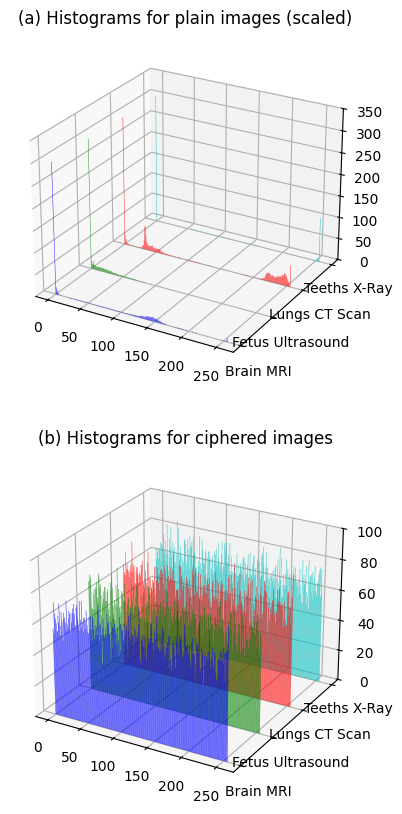

In [69]:
# ---------------------------------------------------
# Compute histograms for plain images
# ---------------------------------------------------
plain_arrays = [image_array1, image_array2, image_array3, image_array4]
plain_histograms = [
    np.histogram(img.flatten(), bins=256, range=(0, 255))[0]
    for img in plain_arrays
]

# Scale down plain histograms for clear visualization
plain_histograms_scaled = [
    (hist / hist.max() * 300).astype(int) for hist in plain_histograms
]

# ---------------------------------------------------
# Compute histograms for ciphered images
# ---------------------------------------------------
cipher_arrays = [cipher_array1, cipher_array2, cipher_array3, cipher_array4]
ciphered_histograms = [
    np.histogram(carr.flatten(), bins=256, range=(0, 255))[0]
    for carr in cipher_arrays
]

# ---------------------------------------------------
# Create figure and 3D subplots (VERTICAL layout)
# ---------------------------------------------------
fig = plt.figure(figsize=(8, 10))  # taller figure to stack plots vertically

# --- (a) Plain Images ---
ax1 = fig.add_subplot(211, projection='3d')  # 2 rows, 1 column, first plot
for i, (img, hist, color) in enumerate(zip(images, plain_histograms_scaled, colors)):
    xs = bins
    ys = np.full_like(xs, i)
    ax1.bar(xs, hist, zs=i, zdir='y', color=color, alpha=0.8)

ax1.set_title('(a) Histograms for plain images (scaled)')
ax1.set_yticks(range(len(images)))
ax1.set_yticklabels(images)
ax1.view_init(elev=25, azim=-60)
ax1.set_zlim(0, 350)

# --- (b) Ciphered Images ---
ax2 = fig.add_subplot(212, projection='3d')  # 2 rows, 1 column, second plot
for i, (img, hist, color) in enumerate(zip(images, ciphered_histograms, colors)):
    xs = bins
    ys = np.full_like(xs, i)
    ax2.bar(xs, hist, zs=i, zdir='y', color=color, alpha=0.8)

ax2.set_title('(b) Histograms for ciphered images')
ax2.set_yticks(range(len(images)))
ax2.set_yticklabels(images)
ax2.view_init(elev=25, azim=-60)
ax2.set_zlim(0, 100)

plt.tight_layout()
plt.show()


## Cryptoanalysis

In [70]:
plain_arrays
cipher_arrays

[array([ 11, 121, 247, ...,  22,  80, 149], dtype=uint8),
 array([113, 177, 101, ...,  61, 198, 198], dtype=uint8),
 array([144, 254, 205, ..., 133,  89, 173], dtype=uint8),
 array([215, 159,  99, ..., 194, 163,  36], dtype=uint8)]

In [71]:
import numpy as np
import random
from main import deep_learning_based_encryption_decryption
def npcr(cipher1, cipher2):
    """
    Compute NPCR (Number of Pixel Change Rate)
    between two ciphertext images (2D arrays).
    """
    c1 = np.asarray(cipher1).astype(np.uint8)
    c2 = np.asarray(cipher2).astype(np.uint8)
    total = c1.size
    diff = np.sum(c1 != c2)
    return (diff / total) * 100.0


# ----------------------------
# Image & biometric inputs
# ----------------------------
image_paths = [
    "medical images/Brain MRI.jpg",
    "medical images/fetus ultrasound.jpg",
    "medical images/lung ct scan.jpg",
    "medical images/teeth xray.jpg"
]

biometric_enroll = "biometric images/kelvinl3.jpg"
biometric_probe = "biometric images/kelvinl5.jpg"

npcr_values = []

# ----------------------------
# Loop for each image
# ----------------------------
for idx, image_path in enumerate(image_paths, start=1):
    print(f"\n{'='*65}")
    print(f"🧩 Processing Image {idx}: {image_path}")
    print(f"{'='*65}")

    # --- 1️⃣ Encrypt original image ---
    [img, subs, pert, cipher_img, rec_pert, inv_subs, rec] = deep_learning_based_encryption_decryption(
        image_path=image_path,
        biometric_enroll=biometric_enroll,
        biometric_probe=biometric_probe
    )

    # --- 2️⃣ Make a one-pixel modification ---
    img_modified = img.copy()
    H, W = img.shape
    rand_i, rand_j = random.randint(0, H-1), random.randint(0, W-1)
    img_modified[rand_i, rand_j] = (img_modified[rand_i, rand_j] + 1) % 256
    print(f"   → Flipped pixel at ({rand_i}, {rand_j})")

    # --- 3️⃣ Encrypt the modified image ---
    [img2, subs2, pert2, cipher_img2, _, _, _] = deep_learning_based_encryption_decryption(
        image_path=image_path,
        biometric_enroll=biometric_enroll,
        biometric_probe=biometric_probe
    )

    # --- 4️⃣ Compute NPCR between both ciphertexts ---
    npcr_value = npcr(cipher_img, cipher_img2)
    npcr_values.append(npcr_value)
    print(f"✅ NPCR for Image {idx}: {npcr_value:.4f}%")

# ----------------------------
# Summary table
# ----------------------------
print("\n" + "="*65)
print("📊 INDIVIDUAL NPCR RESULTS")
print("="*65)
for i, (path, val) in enumerate(zip(image_paths, npcr_values), start=1):
    print(f"Image {i}: {path.split('/')[-1]:<25} → NPCR = {val:.4f}%")

mean_npcr = np.mean(npcr_values)
std_npcr = np.std(npcr_values)
print("-"*65)
print(f"Average NPCR = {mean_npcr:.4f}% ± {std_npcr:.4f}")
print("="*65)



🧩 Processing Image 1: medical images/Brain MRI.jpg
Original image shape: (128, 128)

STEP 1: SUBSTITUTION
Performing substitution...
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
✓ Substitution complete!

STEP 2: PERTURBATION
Performing perturbation on substituted image...
✓ Perturbation complete!
[Enrollment] Processing: biometric images/kelvinl3.jpg
[Enrollment] Key generated (32 bytes), Helper data created
[AES Encrypt] Array shape (128, 128), dtype uint8
[AES Encrypt] Plaintext: 16384 bytes → Ciphertext: 16400 bytes
[Reproduction] Processing: biometric images/kelvinl5.jpg
[Reproduction] BCH decoding successful
[Reproduction] Key reproduced successfully (32 bytes)
[AES Decrypt] Ciphertext: 16400 bytes → Plaintext: 16384 bytes
[AES Decrypt] Reconstructed array shape (128, 128), dtype uint8
✓ Inverse Perturbation complete!
  Processing row 0/128
  Processing row 50/128
  Processing row 100/128
   → Flipped pixel at (54, 23)
Original image shape: (128, 128)



In [72]:
npcr_values

[99.6337890625, 99.664306640625, 99.658203125, 99.59716796875]

#### calculating entropy from cipher_array1

In [73]:
hist, _ = np.histogram(cipher_array3.flatten(), bins=256, range=(0, 255))


In [74]:
prob = hist / np.sum(hist)


In [75]:
entropy = -np.sum(prob * np.log2(prob + 1e-12))  # add tiny epsilon to avoid log(0)


In [76]:
# Entropy 
entropy


7.989183523561273

#### comparing entropy with plain image


In [77]:
image_array1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

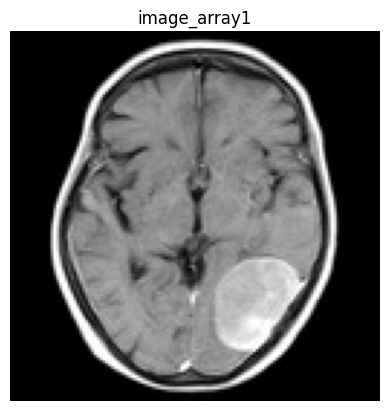

In [78]:
import matplotlib.pyplot as plt

if image_array1 is not None:
    plt.imshow(image_array1, cmap='gray')
    plt.title("image_array1")
    plt.axis('off')
    plt.show()

In [79]:
hist2, _ = np.histogram(image_array1.flatten(), bins=256, range=(0, 255))


In [80]:
prob2 = hist2 / np.sum(hist2)


In [81]:
entropy = -np.sum(prob2 * np.log2(prob2 + 1e-12))  # add tiny epsilon to avoid log(0)


In [82]:
entropy

5.665302978728167

#### Calculating Correlation

In [83]:
import numpy as np

def correlation_coefficients(image):
    """
    Calculates horizontal, vertical, and diagonal pixel correlation coefficients
    for a grayscale image.
    """
    img = image.astype(np.float64)
    h, w = img.shape
    
    # Create shifted versions for each direction
    img_right = img[:, 1:]       # horizontally shifted
    img_down = img[1:, :]        # vertically shifted
    img_diag = img[1:, 1:]       # diagonally shifted
    
    # Crop the originals to match sizes
    img_h = img[:, :-1]
    img_v = img[:-1, :]
    img_d = img[:-1, :-1]
    
    # Define a helper to compute correlation
    def corr(a, b):
        a_mean, b_mean = np.mean(a), np.mean(b)
        num = np.sum((a - a_mean) * (b - b_mean))
        den = np.sqrt(np.sum((a - a_mean)**2) * np.sum((b - b_mean)**2))
        return num / den
    
    r_h = corr(img_h.flatten(), img_right.flatten())
    r_v = corr(img_v.flatten(), img_down.flatten())
    r_d = corr(img_d.flatten(), img_diag.flatten())
    
    return r_h, r_v, r_d


In [84]:
from helper import ciphertext_to_image
H, W = image_array1.shape
cipher_img1 = ciphertext_to_image(ciphertext1, (H, W))

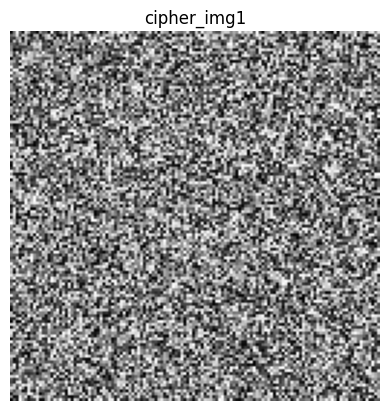

In [85]:
import matplotlib.pyplot as plt

if cipher_img1 is not None:
    plt.imshow(cipher_img1, cmap='gray')
    plt.title("cipher_img1")
    plt.axis('off')
    plt.show()

In [86]:
def correlation_coefficients(image2d_uint8):
    img = image2d_uint8.astype(np.float64)

    # shift pairs
    Ih = img[:, :-1];      Jh = img[:, 1:]      # horizontal neighbors
    Iv = img[:-1, :];      Jv = img[1:, :]      # vertical neighbors
    Id = img[:-1, :-1];    Jd = img[1:, 1:]     # main-diagonal neighbors

    def corr(a, b):
        a = a.ravel(); b = b.ravel()
        am = a.mean(); bm = b.mean()
        num = ((a - am) * (b - bm)).sum()
        den = np.sqrt(((a - am)**2).sum() * ((b - bm)**2).sum())
        return num / den

    return corr(Ih, Jh), corr(Iv, Jv), corr(Id, Jd)


In [95]:
# Plain
rH_p, rV_p, rD_p = correlation_coefficients(image_array4)

# Pre-AES (perturbed)
rH_pp, rV_pp, rD_pp = correlation_coefficients(perturbed_array4)

# AES ciphertext reshaped to (H,W)
cipher_img2 = ciphertext_to_image(ciphertext4, image_array4.shape)
rH_c, rV_c, rD_c = correlation_coefficients(cipher_img2)

print("Plain      :", rH_p, rV_p, rD_p)
print("Perturbed  :", rH_pp, rV_pp, rD_pp)
print("AES Cipher :", rH_c, rV_c, rD_c)


Plain      : 0.9783820191134919 0.926791080475772 0.9125371729135587
Perturbed  : 0.01577795795942912 -0.008988911013076606 0.007622606268673825
AES Cipher : -0.007050629264723181 -0.01604754604284095 0.01298106234361947


In [88]:
import numpy as np

def chi_square_test_from_hist(hist, expected_prob=None):
    """
    Compute chi-square statistic and (if possible) p-value from a histogram.

    Args:
        hist: 1D array-like of length 256 with counts (observed frequencies).
        expected_prob: If None assumes uniform over 256 bins; otherwise an array-like
                       of length 256 with expected probabilities summing to 1.

    Returns:
        dict with keys:
            'chi2' : chi-square statistic (float)
            'df'   : degrees of freedom (int, 255)
            'p'    : p-value (float) OR None if scipy not available
            'N'    : total counts (int)
    """
    hist = np.asarray(hist, dtype=np.float64)
    if hist.size != 256:
        raise ValueError("hist must be length 256")
    N = hist.sum()
    if expected_prob is None:
        expected_prob = np.ones(256, dtype=np.float64) / 256.0
    expected_counts = expected_prob * N

    # Avoid dividing by zero: if any expected_count is zero, skip that bin
    mask = expected_counts > 0
    chi2 = np.sum((hist[mask] - expected_counts[mask])**2 / expected_counts[mask])
    df = int(mask.sum() - 1)  # usually 256 - 1 = 255

    # Try to compute p-value using scipy if available
    p = None
    try:
        from scipy.stats import chi2 as chi2_dist
        # survival function gives p-value for observed chi2 or more extreme
        p = chi2_dist.sf(chi2, df)
    except Exception:
        # scipy not installed or something failed: return p=None
        p = None

    return {"chi2": float(chi2), "df": df, "p": p, "N": int(N)}


def chi_square_from_bytes(cipher_bytes, shape=None):
    """
    Build 256-bin histogram from byte sequence and run chi-square against uniform.
    If shape is provided (H,W), we will trim/pad bytes to H*W so result matches image-size.
    """
    arr = np.frombuffer(cipher_bytes, dtype=np.uint8)
    if shape is not None:
        H, W = shape
        total = H * W
        if arr.size >= total:
            arr = arr[:total]
        else:
            pad = np.random.randint(0, 256, size=(total - arr.size,), dtype=np.uint8)
            arr = np.concatenate([arr, pad])
    hist, _ = np.histogram(arr.flatten(), bins=256, range=(0, 256))
    return chi_square_test_from_hist(hist)


def chi_square_from_image_array(img_array):
    """
    img_array: 2D uint8 numpy array (grayscale) or 1D byte array-like
    """
    arr = np.asarray(img_array).flatten()
    # If this is bytes-like (dtype=uint8) it's fine; otherwise cast
    arr = arr.astype(np.uint8)
    hist, _ = np.histogram(arr, bins=256, range=(0, 256))
    return chi_square_test_from_hist(hist)


In [89]:
# Plain image
res_plain1 = chi_square_from_image_array(image_array1)
print("Plain image 1:", res_plain1)

# Ciphertext bytes mapped to image shape (important for adjacency tests; not necessary for chi2,
# but keeps counts comparable to plaintext image size)
res_cipher1 = chi_square_from_bytes(ciphertext1, shape=image_array1.shape)
print("Ciphertext 1:", res_cipher1)

# Do for all four samples and show nicely
results = []
for i, (img_arr, ct) in enumerate(zip(
        [image_array1, image_array2, image_array3, image_array4],
        [ciphertext1, ciphertext2, ciphertext3, ciphertext4]), start=1):
    rp = chi_square_from_image_array(img_arr)
    rc = chi_square_from_bytes(ct, shape=img_arr.shape)
    results.append((i, rp, rc))

for idx, rp, rc in results:
    print(f"Sample {idx}: Plain chi2={rp['chi2']:.2f}, df={rp['df']}, p={rp['p']}")
    print(f"          Cipher chi2={rc['chi2']:.2f}, df={rc['df']}, p={rc['p']}")
    print("-"*60)


Plain image 1: {'chi2': 538565.96875, 'df': 255, 'p': 0.0, 'N': 16384}
Ciphertext 1: {'chi2': 212.90625, 'df': 255, 'p': 0.974276015848914, 'N': 16384}
Sample 1: Plain chi2=538565.97, df=255, p=0.0
          Cipher chi2=212.91, df=255, p=0.974276015848914
------------------------------------------------------------
Sample 2: Plain chi2=655923.09, df=255, p=0.0
          Cipher chi2=244.81, df=255, p=0.6655419379131772
------------------------------------------------------------
Sample 3: Plain chi2=143565.66, df=255, p=0.0
          Cipher chi2=244.62, df=255, p=0.6686426401082345
------------------------------------------------------------
Sample 4: Plain chi2=1164754.91, df=255, p=0.0
          Cipher chi2=276.59, df=255, p=0.16858307999956554
------------------------------------------------------------


In [90]:
import numpy as np

def image_entropy(image):
    """
    Compute Shannon entropy of a grayscale image.
    """
    # Flatten image
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 255))
    # Normalize histogram to get probabilities
    prob = hist / np.sum(hist)
    # Avoid log(0)
    prob = prob[prob > 0]
    # Shannon entropy formula
    entropy = -np.sum(prob * np.log2(prob))
    return entropy


In [91]:
entropy_plain = []
entropy_cipher = []

for i, (plain, cipher) in enumerate(zip(plain_arrays, cipher_arrays)):
    H_plain = image_entropy(plain)
    H_cipher = image_entropy(cipher)

    entropy_plain.append(H_plain)
    entropy_cipher.append(H_cipher)

    print(f"Image {i+1}:")
    print(f"  Plain Image Entropy  = {H_plain:.4f}")
    print(f"  Cipher Image Entropy = {H_cipher:.4f}")
    print(f"  Entropy Difference   = {abs(H_cipher - H_plain):.4f}\n")


Image 1:
  Plain Image Entropy  = 5.6653
  Cipher Image Entropy = 7.9906
  Entropy Difference   = 2.3253

Image 2:
  Plain Image Entropy  = 4.9531
  Cipher Image Entropy = 7.9893
  Entropy Difference   = 3.0362

Image 3:
  Plain Image Entropy  = 6.3319
  Cipher Image Entropy = 7.9892
  Entropy Difference   = 1.6572

Image 4:
  Plain Image Entropy  = 3.9333
  Cipher Image Entropy = 7.9877
  Entropy Difference   = 4.0544



In [92]:
cipher_arrays = [cipher_array1, cipher_array2, cipher_array3, cipher_array4]

print("=== Correlation Coefficients for Cipher Images ===\n")

for i, cipher in enumerate(cipher_arrays):
    rh, rv, rd = correlation_coefficients(cipher)
    print(f"Cipher Image {i+1}:")
    print(f"  Horizontal correlation = {rh:.4f}")
    print(f"  Vertical correlation   = {rv:.4f}")
    print(f"  Diagonal correlation   = {rd:.4f}\n")


=== Correlation Coefficients for Cipher Images ===



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed